# **Bitcoin Price Predictor**

  The bitcoin price predictor is a useful project. The blockchain technology is increasing and there are many digital currencies rising. This project will help us predict the price of the bitcoin using previous data.

## **Importing the Libraries**

In [2]:
# for basic operations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# for interactive analysis
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

# for time series analysis
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

## **Reading the Data**

In [4]:
# lets import the dataset
data = pd.read_csv('bitcoin.csv')

# lets check the shape of the dataset
data.shape

(1877, 7)

In [5]:
# lets check the columns in the dataset
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
# lets check the head of the dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736825
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702624


In [7]:
# lets check the tail of the dataset
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1872,2019-11-02,8291.172852,8397.126953,8282.598633,8349.874023,8349.874023,19021882025
1873,2019-11-03,8349.936523,8399.804688,8186.173828,8270.445313,8270.445313,18924326413
1874,2019-11-04,8270.670898,8541.590820,8259.809570,8458.521484,8458.521484,23517560012
1875,2019-11-05,8458.875000,8540.323242,8359.278320,8436.573242,8436.573242,23658103729
1876,2019-11-06,8435.071289,8512.726563,8406.735352,8456.394531,8456.394531,20898606220


In [8]:
# lets check the summary of the dataset
data.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
414,2015-11-05,375.726898,411.853333,344.189087,355.072144,355.072144,139532204
1151,2017-11-11,5674.877930,5893.123535,5319.574707,5451.084473,5451.084473,4208762918
241,2015-05-16,207.531219,207.577515,205.479874,206.229156,206.229156,9684481
368,2015-09-20,204.614914,205.469101,204.182510,204.829910,204.829910,12796509
601,2016-05-10,404.637573,405.877319,394.442108,396.495758,396.495758,51843211


## **Exploratory Data Analysis**

In statistics,Exploratory Analysis(EDA)is an approach to analyzing data sets to summarize their main characteristics,often with visual methods.

A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In [9]:
# lets check the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1877 non-null   object 
 1   Open       1877 non-null   float64
 2   High       1877 non-null   float64
 3   Low        1877 non-null   float64
 4   Close      1877 non-null   float64
 5   Adj Close  1877 non-null   float64
 6   Volume     1877 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 102.8+ KB


In [12]:
# lets check the data types of the data
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
# lets check the null values if present in the data
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## **Inferential Statistics**

Descriptive statistics describes data (for example, a chart or graph) and inferential statistics allows we to make predictions (“inferences”) from that data. With inferential statistics, we take data from samples and make generalizations about a population.

In [11]:
# lets check basic statistics
x = data.describe()
x.style.bar()

,Open,High,Low,Close,Adj Close,Volume
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,3154.947491,3242.307958,3061.373277,3159.182993,3159.182993,3759955264.233884
std,3387.586411,3500.016449,3256.266351,3389.189008,3389.189008,5993465914.374041
min,150.128998,183.047470,145.483078,151.152512,151.152512,4640334.000000
25%,359.653412,367.290466,351.586884,361.037811,361.037811,45118633.000000
50%,1143.132568,1158.665405,1126.988647,1147.171875,1147.171875,378558927.000000
75%,5662.039551,5740.800781,5569.068848,5659.873047,5659.873047,4753825630.000000
max,16572.328125,17094.111328,16157.795898,16590.708984,16590.708984,40157247739.000000


In [13]:
# lets check the correlation
x = data.corr()
x.style.bar(color = ['silver'], align = 'mid')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998790,0.998097,0.997502,0.997502,0.783423
High,0.998790,1.000000,0.997690,0.998988,0.998988,0.785849
Low,0.998097,0.997690,1.000000,0.998661,0.998661,0.783523
Close,0.997502,0.998988,0.998661,1.000000,1.000000,0.784861
Adj Close,0.997502,0.998988,0.998661,1.000000,1.000000,0.784861
Volume,0.783423,0.785849,0.783523,0.784861,0.784861,1.000000


In [14]:
# lets check the covariance of the data
x = data.cov()
x.style.bar(color = 'gold', align = 'mid')

,Open,High,Low,Close,Adj Close,Volume
Open,11475741.690472,11842264.166148,11009896.757403,11452487.260161,11452487.260161,15906146097813.324219
High,11842264.166148,12250115.141358,11370654.257386,11850211.705606,11850211.705606,16484925586170.123047
Low,11009896.757403,11370654.257386,10603270.546356,11021329.441767,11021329.441767,15291482908332.146484
Close,11452487.260161,11850211.705606,11021329.441767,11486602.135265,11486602.135265,15942869198168.978516
Adj Close,11452487.260161,11850211.705606,11021329.441767,11486602.135265,11486602.135265,15942869198168.978516
Volume,15906146097813.324219,16484925586170.123047,15291482908332.146484,15942869198168.978516,15942869198168.978516,35921633666763468800.000000


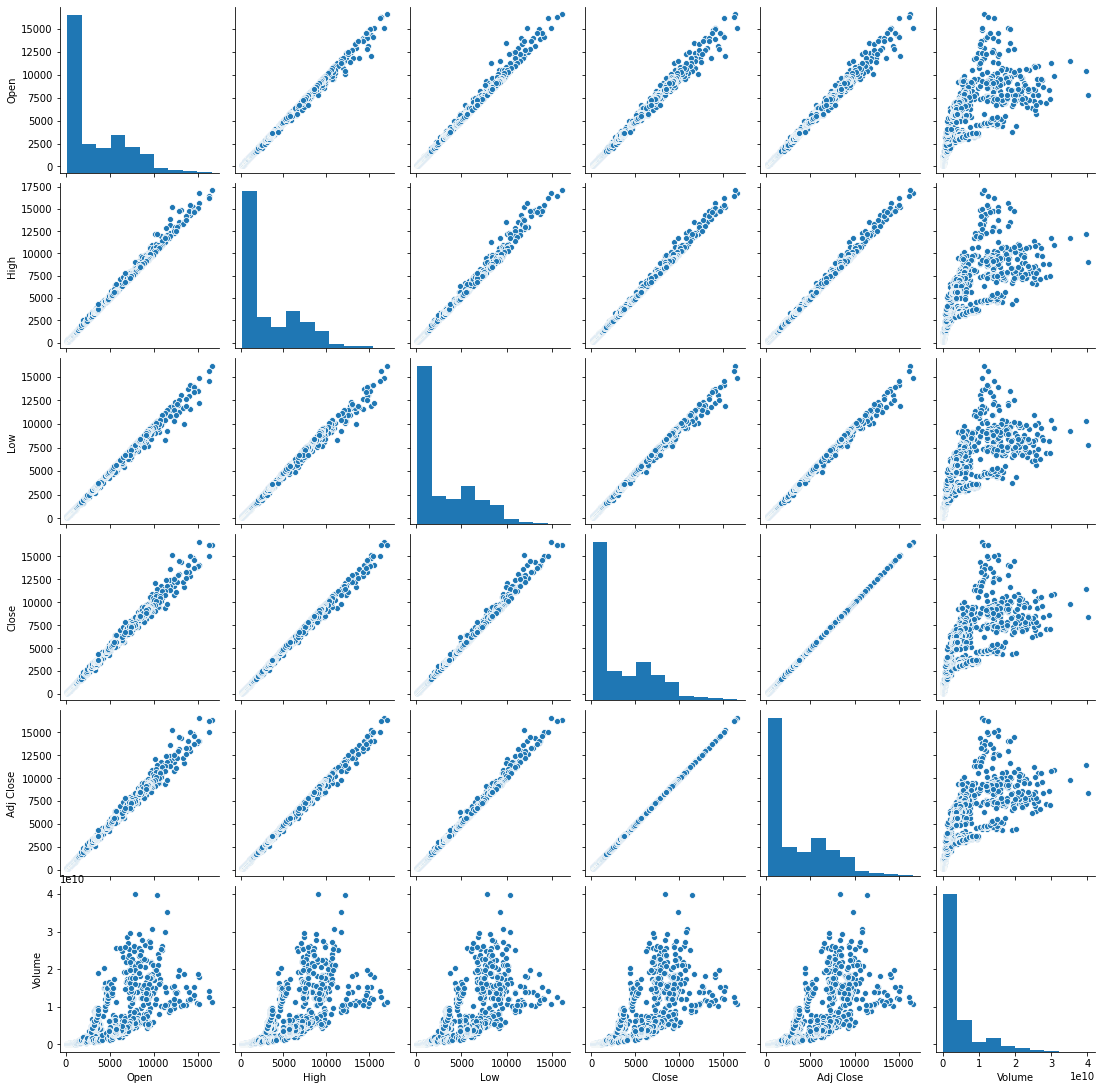

In [15]:
# lets check the pairplot of the data
sns.pairplot(data)
plt.show()

## **Financial Analytics**

Financial analytics is the creation of ad hoc analysis to answer specific business questions and forecast possible future financial scenarios.

The goal of financial analytics is to shape the strategy for business through reliable, factual insight rather than intuition.

In [16]:
# lets convert the date variable into a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# lets check the datatype of the date column now
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

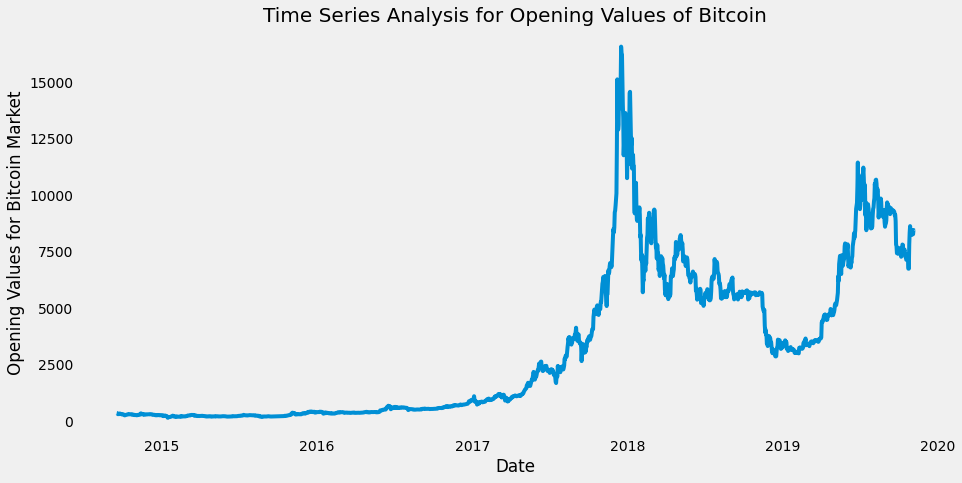

In [17]:
# lets do some plotting

plt.rcParams['figure.figsize'] = (14, 7)
plt.style.use('fivethirtyeight')

sns.lineplot(data['Date'], data['Open'])
plt.title('Time Series Analysis for Opening Values of Bitcoin', fontsize = 20)
plt.xlabel('Date')
plt.grid()
plt.ylabel('Opening Values for Bitcoin Market')
plt.show()

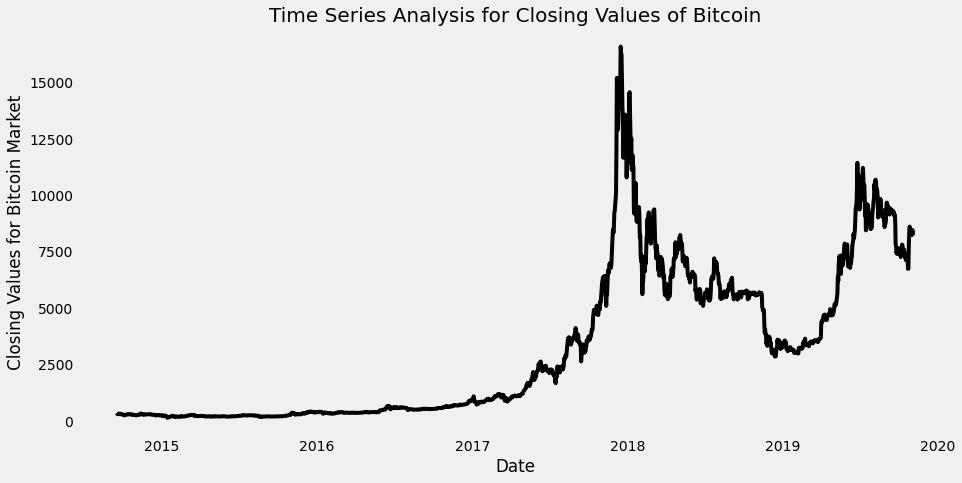

In [18]:
# lets do some plotting

plt.rcParams['figure.figsize'] = (14, 7)
plt.style.use('fivethirtyeight')

sns.lineplot(data['Date'],
             data['Close'],
             color = 'black')
plt.title('Time Series Analysis for Closing Values of Bitcoin', fontsize = 20)
plt.xlabel('Date')
plt.grid()
plt.ylabel('Closing Values for Bitcoin Market')
plt.show()

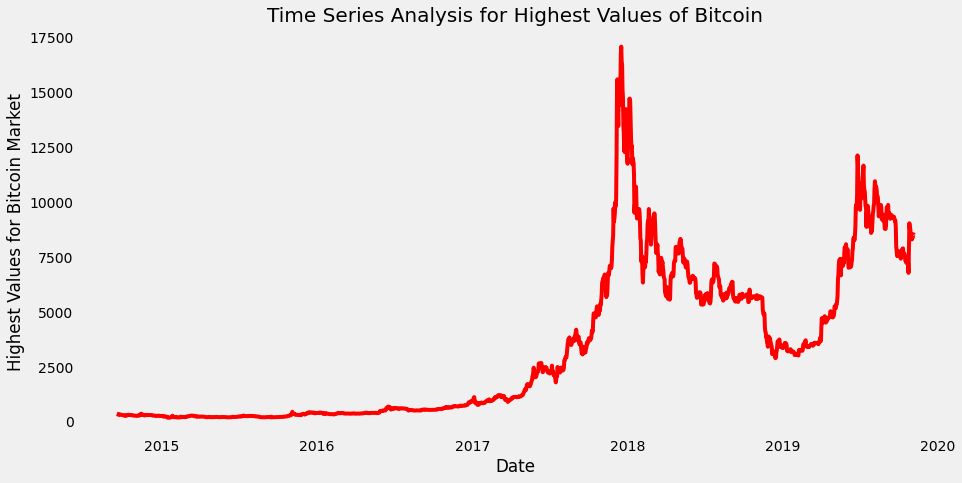

In [19]:
# lets do some plotting

plt.rcParams['figure.figsize'] = (14, 7)
plt.style.use('fivethirtyeight')

sns.lineplot(data['Date'],
             data['High'],
             color = 'red')
plt.title('Time Series Analysis for Highest Values of Bitcoin', fontsize = 20)
plt.xlabel('Date')
plt.grid()
plt.ylabel('Highest Values for Bitcoin Market')
plt.show()

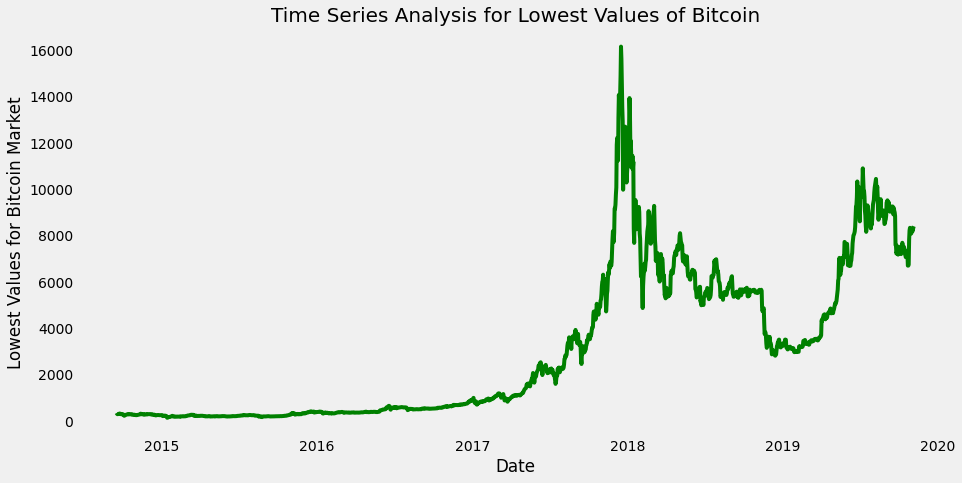

In [20]:
# lets do some plotting

plt.rcParams['figure.figsize'] = (14, 7)
plt.style.use('fivethirtyeight')

sns.lineplot(data['Date'],
             data['Low'],
             color = 'green')
plt.title('Time Series Analysis for Lowest Values of Bitcoin', fontsize = 20)
plt.xlabel('Date')
plt.grid()
plt.ylabel('Lowest Values for Bitcoin Market')
plt.show()

## **Feature Engineering**



### **Daily Lag**

First, we will create the column ‘daily lag’ which is basically just shifting the ‘Close’ price by one day back.


In [21]:
# (Note: there are often various metrics we can use but i am choosing ‘Close’ for convenience)
data['Daily Lag'] = data['Close'].shift(1)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165,NaN
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,355.957367
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102,328.539368
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736825,307.761139
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702624,318.758972


### **Daily Returns**

Daily returns tells us the returns that we obtain in a day after the stock price closes.

In [22]:
# lets make a column called Daily Returns

data['Daily Returns'] = (data['Daily Lag']/data['Close']) -1
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165,NaN,NaN
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,355.957367,0.083454
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102,328.539368,0.067514
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736825,307.761139,-0.034502
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702624,318.758972,0.026161


## **Checking Distributions**

A simple and commonly used plot to quickly check the distribution of a sample of data is the histogram. In the histogram, the data is divided into a pre-specified number of groups called bins.

The data is then sorted into each bin and the count of the number of observations in each bin is retained.

### **Distribution Graph of Daily Lag**

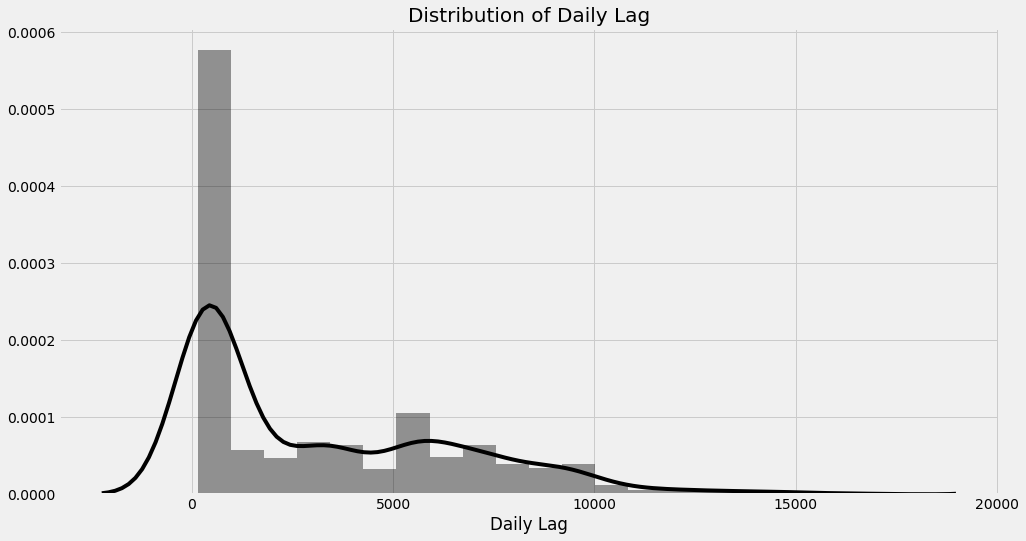

In [23]:
# lets check the Distribution of Daily Lag

plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')

sns.distplot(data['Daily Lag'],
             color = 'black')
plt.title('Distribution of Daily Lag', fontsize = 20)
plt.show()

### **Distribution Graph of Daily Returns**

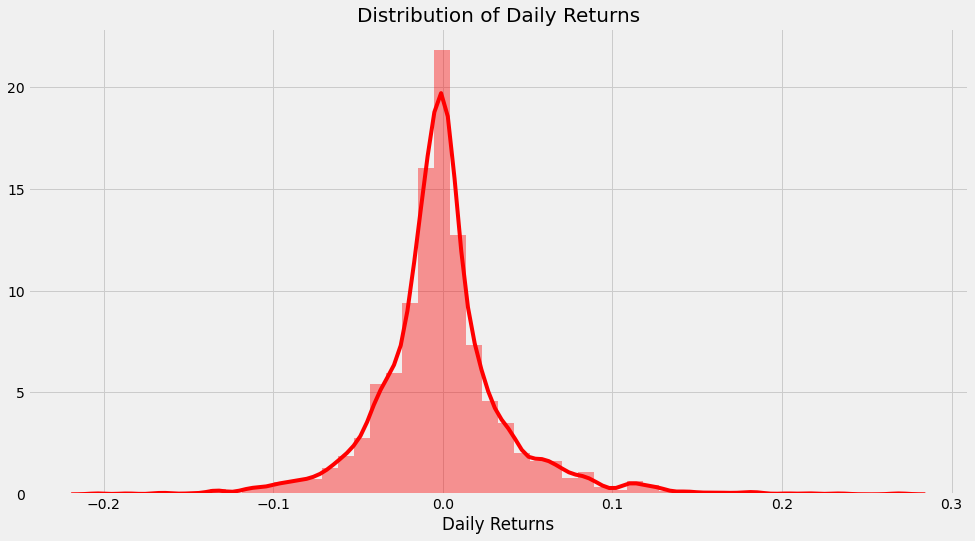

In [24]:
# lets check the Distribution of Daily Lag

plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')

sns.distplot(data['Daily Returns'],
             color = 'red')
plt.title('Distribution of Daily Returns', fontsize = 20)
plt.show()

### **Distribution Graph of Volume**

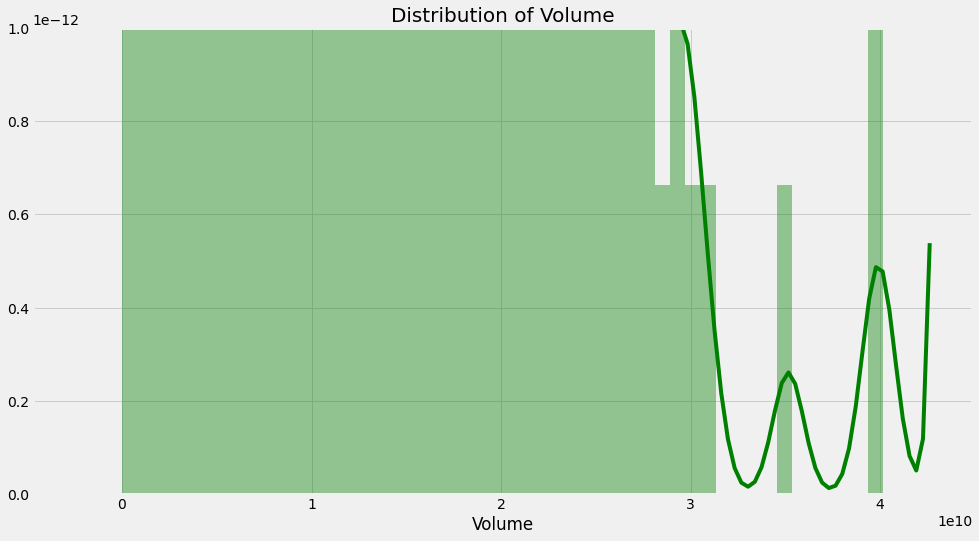

In [26]:
# lets check the Distribution of Volume

plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')

sns.distplot(data['Volume'],
             color = 'green')
plt.title('Distribution of Volume', fontsize = 20)
plt.show()

## **Statistics of Daily Lag And Daily Returns**

In [27]:
# lets check the Statistics of Daily Lag and Daily Returns

mean = data['Daily Returns'].mean()
std = data['Daily Returns'].std()
print('Mean for Daily Returns :', mean)
print('Standard Deviation for Daily Returns :', std)
mean_lag = data['Daily Returns'].mean()
std_lag = data['Daily Returns'].std()
print('Mean for Daily Lag :', mean_lag)
print('Standard Deviation for Daily Lag :', std_lag)

Mean for Daily Returns : -0.0009202219778351076
Standard Deviation for Daily Returns : 0.03941675903822447
Mean for Daily Lag : -0.0009202219778351076
Standard Deviation for Daily Lag : 0.03941675903822447


### **Graph of Buy and Sell Signals**

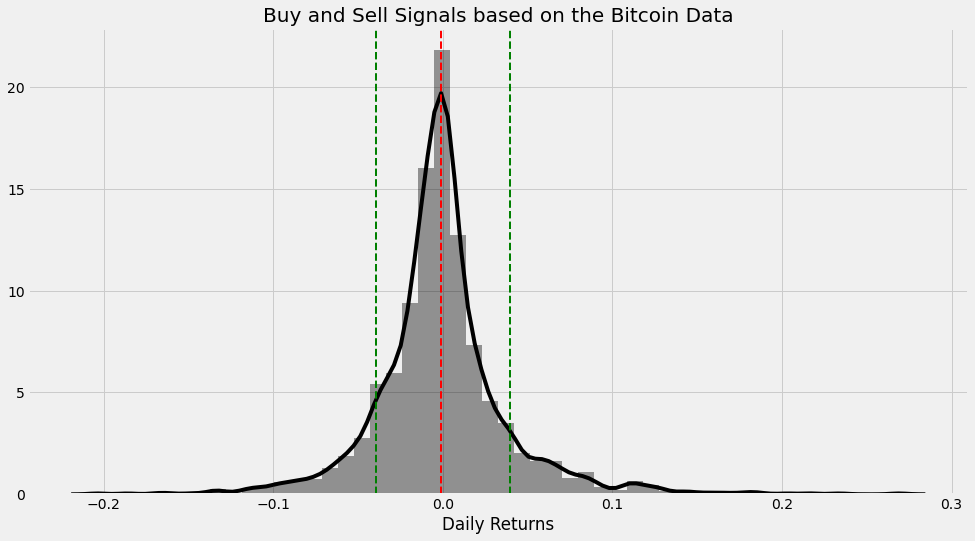

In [28]:
# Generally returns are negative but we have to remember that this only considers the returns on a day-to-day basis 
# and so it just tells us that in general the return if we buy and sell on the same day, we will make a loss.

sns.distplot(data['Daily Returns'],
              color = 'black')
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)

#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)
plt.title('Buy and Sell Signals based on the Bitcoin Data', fontsize = 20)
plt.show()

## **Kurtosis Values**

Kurtosis tells us the ‘fatness’ of the tail and it is important because it tells us how ‘extreme’ can the values get.

In [29]:
# lets check the Kurtosis Values

print("Kurtosis Values for Daily Lags : ", data['Daily Lag'].kurtosis())
print("Kurtosis Values for Daily Returns :", data['Daily Returns'].kurtosis())

Kurtosis Values for Daily Lags :  0.2888694715340234
Kurtosis Values for Daily Returns : 5.770034068011833


## **Time Series Analysis with ARIMA**

AutoRegressive Integrated Moving Average abbreviated as ARIMA,is a Statical Analysis model that uses time series data to either better understand the data set or to predict future trends

In [30]:
# lets import the data 

test = pd.read_csv('Test.csv', index_col = 'Date')
train = pd.read_csv('Training.csv', index_col = 'Date')

# lets check the shape of the dataset
print("Shape of Test Dataset :", test.shape)
print("Shape of Train Dataset :", train.shape)

Shape of Test Dataset : (7, 6)
Shape of Train Dataset : (1556, 6)


In [31]:
# lets check the head of the training dataset

train = train.sort_index()
train.index = pd.to_datetime(train.index)
train.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2014-04-01,457.00,495.34,457.00,478.38,"35,685,800","5,752,280,000"
2015-04-01,244.22,247.54,241.16,247.27,"22,877,200","3,420,100,000"
2016-04-01,416.76,418.17,415.83,417.96,"51,235,700","6,409,540,000"
2017-04-01,1071.71,1091.72,1061.09,1080.50,"289,634,000","17,413,000,000"
2014-04-02,479.14,495.05,431.27,437.14,"49,647,600","6,032,970,000"


In [32]:
# lets check the head of the testing dataset

test = test.sort_index()
test.index = pd.to_datetime(test.index)
test.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-08-01,2871.30,2921.35,2685.61,2718.26,"1,324,670,000","47,321,800,000"
2017-08-02,2727.13,2762.53,2668.59,2710.67,"1,094,950,000","44,950,800,000"
2017-08-03,2709.56,2813.31,2685.14,2804.73,"804,797,000","44,666,400,000"
2017-08-04,2806.93,2899.33,2743.72,2895.89,"1,002,120,000","46,276,200,000"
2017-08-05,2897.63,3290.01,2874.83,3252.91,"1,945,700,000","47,778,200,000"


In [33]:
# preparing the data

train = train['Close']
train.head()

Date
2014-04-01     478.38
2015-04-01     247.27
2016-04-01     417.96
2017-04-01    1080.50
2014-04-02     437.14
Name: Close, dtype: float64

### **Analyzing Bitcoin Prices on Daily Bases**

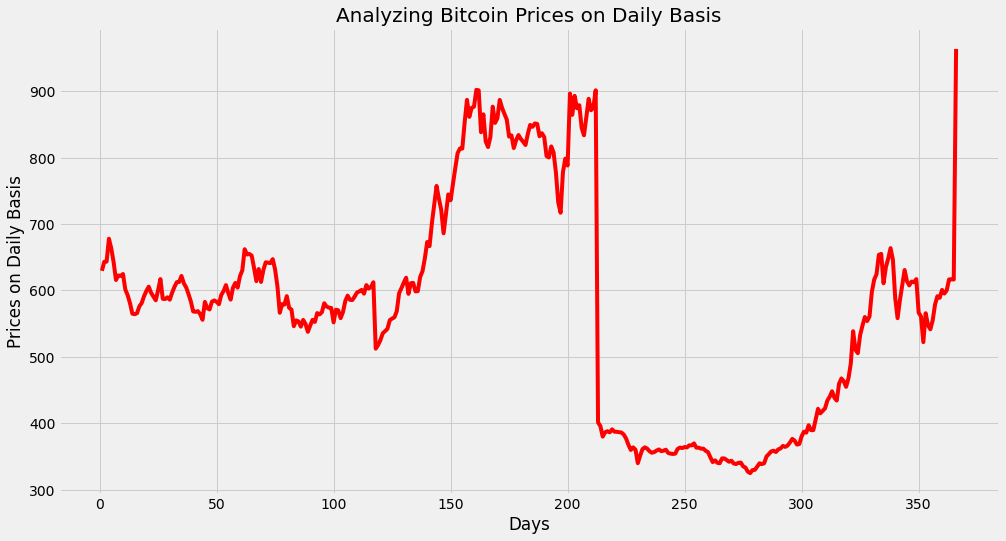

In [34]:
# checking the time series on daily basis

by_day = train.groupby(train.index.dayofyear).mean()
by_day.plot(color = 'red')
plt.title('Analyzing Bitcoin Prices on Daily Basis', fontsize = 20)
plt.ylabel('Prices on Daily Basis')
plt.xlabel('Days')
plt.show()

### **Analyzing Bitcoin Prices on Day Basis**

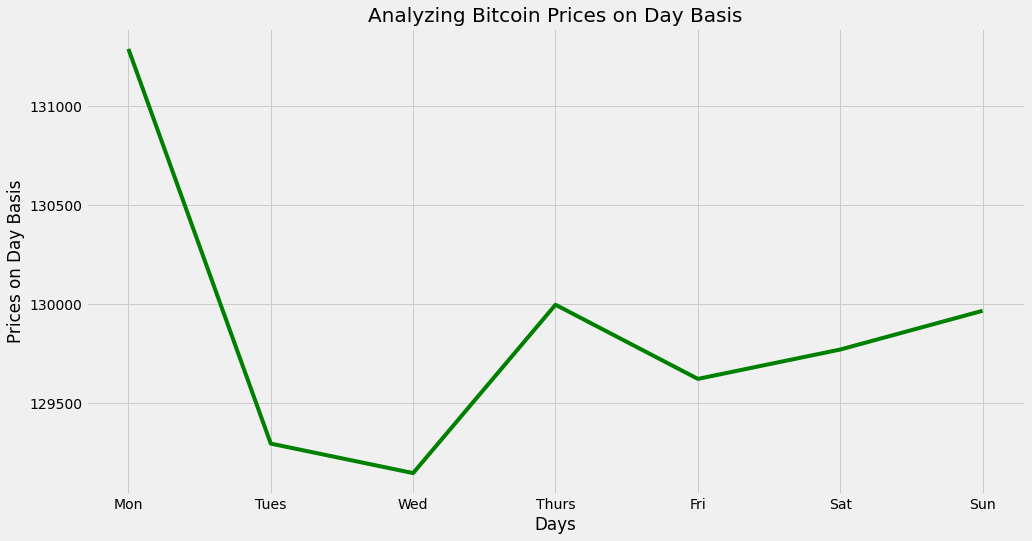

In [35]:
# checking the time series on day basis

by_weekday = train.groupby(train.index.dayofweek).sum()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(color = 'green')
plt.title('Analyzing Bitcoin Prices on Day Basis', fontsize = 20)
plt.ylabel('Prices on Day Basis')
plt.xlabel('Days')
plt.show()

### **Analyzing Bitcoin Prices on Weekly Basis**

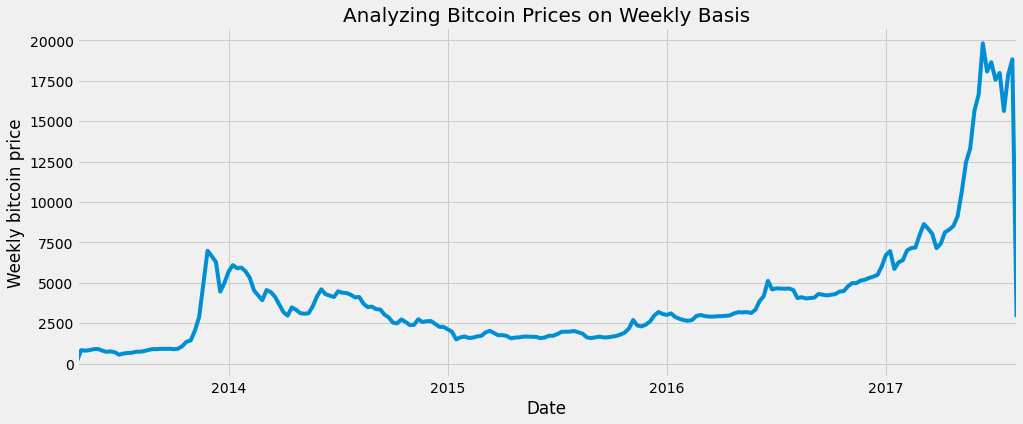

In [36]:
# analyzing data weekly

plt.rcParams['figure.figsize'] = (15, 6)
weekly = train.resample('W').sum()
weekly.plot()
plt.ylabel('Weekly bitcoin price')
plt.title('Analyzing Bitcoin Prices on Weekly Basis', fontsize = 20)
plt.show()

### **Analyzing Bitcoin Prices on Monthly Basis**

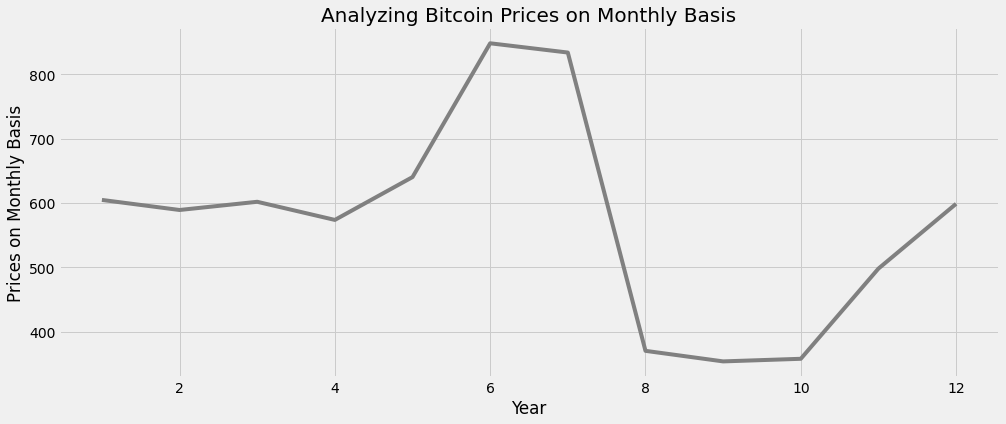

In [37]:
# checking the time series on monthly basis

by_month = train.groupby(train.index.month).mean()
by_month.plot(color = 'grey')
plt.title('Analyzing Bitcoin Prices on Monthly Basis', fontsize = 20)
plt.ylabel('Prices on Monthly Basis')
plt.xlabel('Year')
plt.show()

### **Analyzing Bitcoin Prices on Yearly Basis**

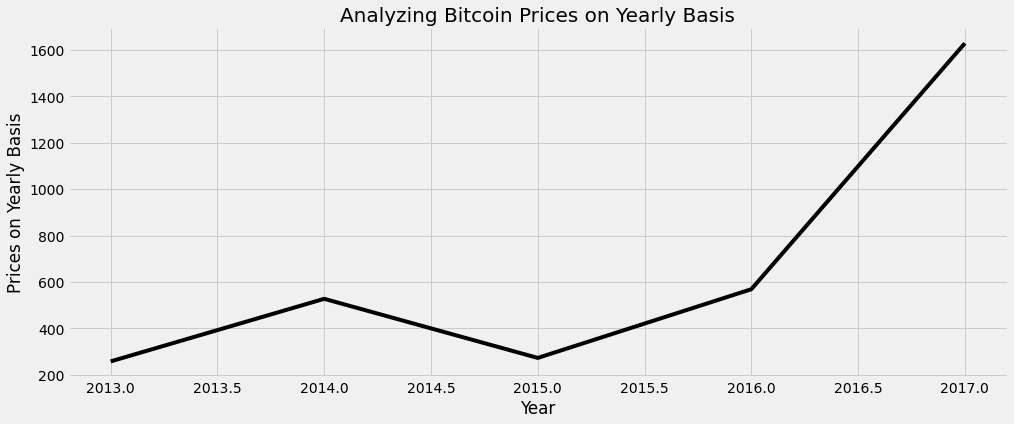

In [38]:
# checking the prices yearly

by_year = train.groupby(train.index.year).mean()
by_year.plot(color = 'black')
plt.title('Analyzing Bitcoin Prices on Yearly Basis', fontsize = 20)
plt.ylabel('Prices on Yearly Basis')
plt.xlabel('Year')
plt.show()

## **Conclusion**

I conclude that we can further predict data based or ARIMA model.

This is how we can predict the prices of the bitcoin which is a cryptocurrency that was invented in 2008.